## Pruebas del modulo de acceso a los datos de contador

In [1]:
import pandas as pd
from kwhmeter import suministro,contador, timezone, append_prices, read_config
from datetime import datetime, timedelta
import seaborn as sns


In [2]:
credenciales=read_config()
connection = contador(**credenciales['alarcon'])
#connection = contador(iberdrola,user,password)  #equivalente
#connection = suministro('alarcon')  #equivalente

Existen 7 facturas. Desde: 2022-06-15 00:00:00+02:00 hasta:2022-12-24 00:00:00+01:00


In [3]:

to_day = timezone.localize(datetime(2022,12,16)-timedelta(days=0))
from_day=to_day-timedelta(days=30)

print(f'Recuperando datos desde: {from_day} hasta:{to_day}')


Recuperando datos desde: 2022-11-16 00:00:00+01:00 hasta:2022-12-16 00:00:00+01:00


In [4]:
facturas=connection.facturas()
facturas

,fechaInicio,fechaFin
factura,,
2022-12-25,2022-11-25 00:00:00+01:00,2022-12-24 00:00:00+01:00
2022-11-25,2022-10-25 00:00:00+02:00,2022-11-24 00:00:00+01:00
2022-10-25,2022-09-25 00:00:00+02:00,2022-10-24 00:00:00+02:00
2022-09-25,2022-08-25 00:00:00+02:00,2022-09-24 00:00:00+02:00
2022-08-25,2022-07-25 00:00:00+02:00,2022-08-24 00:00:00+02:00
2022-07-25,2022-06-25 00:00:00+02:00,2022-07-24 00:00:00+02:00
2022-06-25,2022-06-15 00:00:00+02:00,2022-06-24 00:00:00+02:00


In [5]:
cc=connection.consumo(from_day,to_day)
#cc=connection.consumo_facturado(['2022-11-25'])
cc=append_prices(cc)


INFO:root:recovering missing dates:0


In [6]:
cc

,consumo,tipo,periodo,factura,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
fecha,,,,,,,,,,
2022-11-16 01:00:00+01:00,0.0,R,P3,2022-11-25,131.66,3.56,3.03,0.0,0.0,0.0
2022-11-16 02:00:00+01:00,0.0,R,P3,2022-11-25,129.61,3.96,3.03,0.0,0.0,0.0
2022-11-16 03:00:00+01:00,0.0,R,P3,2022-11-25,127.23,3.04,3.03,0.0,0.0,0.0
2022-11-16 04:00:00+01:00,0.0,R,P3,2022-11-25,128.41,4.15,3.03,0.0,0.0,0.0
2022-11-16 05:00:00+01:00,0.0,R,P3,2022-11-25,131.03,5.00,3.03,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-15 20:00:00+01:00,0.0,R,P1,2022-12-25,377.89,58.69,74.41,0.0,0.0,0.0
2022-12-15 21:00:00+01:00,0.0,R,P1,2022-12-25,367.97,59.52,74.41,0.0,0.0,0.0
2022-12-15 22:00:00+01:00,0.0,R,P1,2022-12-25,327.83,61.77,74.41,0.0,0.0,0.0


<AxesSubplot:xlabel='fecha'>

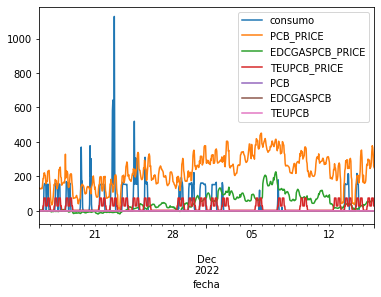

In [7]:
cc.plot()

In [8]:
cc.to_csv('consumos.csv',decimal=',')


In [9]:
totales=cc.groupby(['factura'])[['consumo','PCB','EDCGASPCB','TEUPCB']].sum()
totales

,consumo,PCB,EDCGASPCB,TEUPCB
factura,,,,
2022-11-25,12818.0,2.219168,-0.07133,0.608379
2022-12-25,11515.0,3.121651,0.47470,0.628877


In [10]:
cc['2022-08-25':'2022-09-30']['consumo'].sum()+cc['2022-10-01':'2022-10-24']['consumo'].sum()

0.0

In [11]:
cc.groupby(['factura','tipo']).sum()

<ipython-input-11-4a6b15d68e66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','tipo']).sum()


,,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
factura,tipo,,,,,,,
2022-11-25,R,12818.0,27872.77,-1043.65,5229.12,2.219168,-0.07133,0.608379
2022-12-25,R,11515.0,134758.85,33446.10,11624.87,3.121651,0.47470,0.628877


In [12]:
cc.groupby(['factura','periodo']).sum()

<ipython-input-12-3d54d8d27882>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','periodo']).sum()


consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo                                                      
2022-11-25 P1        6326.0   10173.24          -145.56       3571.68   
           P2        4638.0    7587.56          -196.01       1366.56   
           P3        1854.0   10111.97          -702.08        290.88   
2022-12-25 P1        6553.0   33325.79          5445.21       7738.64   
           P2        4962.0   27490.36          5685.41       2989.35   
           P3           0.0   73942.70         22315.48        896.88   

                         PCB  EDCGASPCB    TEUPCB  
factura    periodo                                 
2022-11-25 P1       1.305188  -0.023853  0.470718  
           P2       0.675111  -0.031926  0.132044  
           P3       0.238869  -0.015551  0.005618  
2022-12-25 P1       1.893907   0.247295  0.487609  
           P2       1.227744   0.227406  0.141268  
           P3       0.000000   0.000000  0.000000

In [13]:
cc.groupby(['factura','periodo','tipo']).sum()

consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo tipo                                                      
2022-11-25 P1      R      6326.0   10173.24          -145.56       3571.68   
           P2      R      4638.0    7587.56          -196.01       1366.56   
           P3      R      1854.0   10111.97          -702.08        290.88   
2022-12-25 P1      R      6553.0   33325.79          5445.21       7738.64   
           P2      R      4962.0   27490.36          5685.41       2989.35   
           P3      R         0.0   73942.70         22315.48        896.88   

                              PCB  EDCGASPCB    TEUPCB  
factura    periodo tipo                                 
2022-11-25 P1      R     1.305188  -0.023853  0.470718  
           P2      R     0.675111  -0.031926  0.132044  
           P3      R     0.238869  -0.015551  0.005618  
2022-12-25 P1      R     1.893907   0.247295  0.487609  
           P2      R     1.227744   0.227406  0.141268  
           P3      R     0.000000   0.000000  0.000000

<ipython-input-14-f9d6a7d50a59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')


<AxesSubplot:xlabel='factura', ylabel='consumo'>

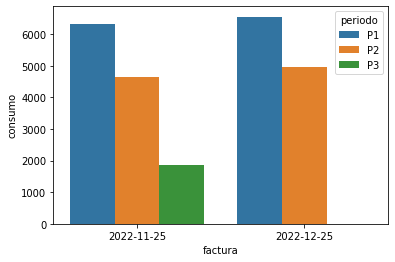

In [14]:
sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')